In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
plt.style.use('seaborn-v0_8-whitegrid')
colors = ['#766CDB', '#DA847C', '#D9CC8B', '#7CD9A5', '#877877', '#52515E']

# Set plot dimensions and layout
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.title_fontsize'] = 14


## Data Loading and Preprocessing

In [2]:
# Load the data
df = pd.read_csv('most_visited_nps_species_data_tidy.csv')
print(f"Loaded data with {df.shape[0]} rows and {df.shape[1]} columns")
df.head()


Loaded data with 61119 rows and 28 columns


,ParkCode,ParkName,CategoryName,Order,Family,TaxonRecordStatus,SciName,CommonNames,Synonyms,ParkAccepted,...,ParkTags,References,Observations,Vouchers,ExternalLinks,TEStatus,StateStatus,OzoneSensitiveStatus,GRank,SRank
0,ACAD,Acadia National Park,Mammal,Artiodactyla,Cervidae,Active,Alces alces,Moose,NaN,True,...,NaN,11,1,0,NaN,50,NaN,NaN,G5,ME: S5
1,ACAD,Acadia National Park,Mammal,Artiodactyla,Cervidae,Active,Odocoileus virginianus,Northern White-tailed Deer,NaN,True,...,NaN,20,0,0,NaN,50,NaN,NaN,G5,ME: S5
2,ACAD,Acadia National Park,Mammal,Carnivora,Canidae,Active,Canis latrans,Coyote,NaN,True,...,NaN,8,1,0,NaN,SC,NaN,NaN,G5,ME: S5
3,ACAD,Acadia National Park,Mammal,Carnivora,Canidae,Active,Canis lupus,Eastern Timber Wolf,NaN,True,...,NaN,2,0,0,NaN,E,NaN,NaN,G5,ME: SH
4,ACAD,Acadia National Park,Mammal,Carnivora,Canidae,Active,Vulpes vulpes,Black Fox,NaN,True,...,NaN,16,0,0,NaN,NaN,NaN,NaN,G5,ME: S5


In [3]:
# Data preprocessing
# Fill NaN values with empty strings for easier processing
df['TEStatus'] = df['TEStatus'].fillna('')
df['StateStatus'] = df['StateStatus'].fillna('')

# Create a new column for conservation status
def get_conservation_status(row):
    # Check federal status first (TEStatus)
    if pd.notna(row['TEStatus']) and row['TEStatus'] in ['E', 'T']:
        return 'Endangered/Threatened'
    elif pd.notna(row['TEStatus']) and row['TEStatus'] in ['SC', 'C']:
        return 'Special Concern'
    # Then check state status
    elif pd.notna(row['StateStatus']) and row['StateStatus'] in ['SE', 'ST']:
        return 'Endangered/Threatened'
    elif pd.notna(row['StateStatus']) and row['StateStatus'] in ['SC']:
        return 'Special Concern'
    else:
        return 'Not Listed'

df['ConservationStatus'] = df.apply(get_conservation_status, axis=1)

# Create a summary dataframe
park_stats = pd.DataFrame({
    'TotalSpecies': df.groupby('ParkName').size(),
    'EndangeredCount': df[df['ConservationStatus'] == 'Endangered/Threatened'].groupby('ParkName').size(),
    'SpecialConcernCount': df[df['ConservationStatus'] == 'Special Concern'].groupby('ParkName').size()
}).fillna(0).astype(int)

park_stats['EndangeredPercent'] = park_stats['EndangeredCount'] / park_stats['TotalSpecies'] * 100
park_stats['SpecialConcernPercent'] = park_stats['SpecialConcernCount'] / park_stats['TotalSpecies'] * 100

park_stats.head()


,TotalSpecies,EndangeredCount,SpecialConcernCount,EndangeredPercent,SpecialConcernPercent
ParkName,,,,,
Acadia National Park,1709,3,160,0.175541,9.362200
Bryce Canyon National Park,1287,3,116,0.233100,9.013209
Cuyahoga Valley National Park,1942,2,104,0.102987,5.355304
Glacier National Park,2559,4,131,0.156311,5.119187
Grand Canyon National Park,2708,13,213,0.480059,7.865583


## Chart 1: Biodiversity in Most Visited National Parks

In [4]:
# Get the most visited parks (we'll use the ones with the most species for this example)
most_visited_parks = park_stats.sort_values('TotalSpecies', ascending=False).head(10).index.tolist()
print(f"Top 10 parks by species count: {most_visited_parks}")

# Filter the dataframe for these parks
most_visited_df = df[df['ParkName'].isin(most_visited_parks)]

# Count species by category for each park
biodiversity_data = pd.crosstab(most_visited_df['ParkName'], most_visited_df['CategoryName'])

# Sort parks by total species count
biodiversity_data = biodiversity_data.loc[park_stats.loc[biodiversity_data.index]['TotalSpecies'].sort_values(ascending=False).index]

# Display the biodiversity data
biodiversity_data.head()


Top 10 parks by species count: ['Great Smoky Mountains National Park', 'Yellowstone National Park', 'Rocky Mountain National Park', 'Grand Canyon National Park', 'Glacier National Park', 'Indiana Dunes National Park', 'Joshua Tree National Park', 'Grand Teton National Park', 'Yosemite National Park', 'Hot Springs National Park']


CategoryName,Amphibian,Bacteria,Bird,Chromista,Crab/Lobster/Shrimp,Fish,Fungi,Insect,Mammal,Non-vascular Plant,Other Non-vertebrates,Protozoa,Reptile,Slug/Snail,Spider/Scorpion,Vascular Plant
ParkName,,,,,,,,,,,,,,,,
Great Smoky Mountains National Park,58,294,267,654,125,110,5243,12398,101,1039,993,257,47,291,4630,2163
Yellowstone National Park,9,4,330,204,64,19,37,1764,78,15,80,18,9,61,43,1444
Rocky Mountain National Park,5,45,278,150,39,12,306,676,75,416,48,9,3,10,22,1119
Grand Canyon National Park,15,0,456,0,2,29,0,125,107,0,1,0,76,2,142,1753
Glacier National Park,6,0,277,2,6,27,276,197,69,404,2,0,4,20,0,1269


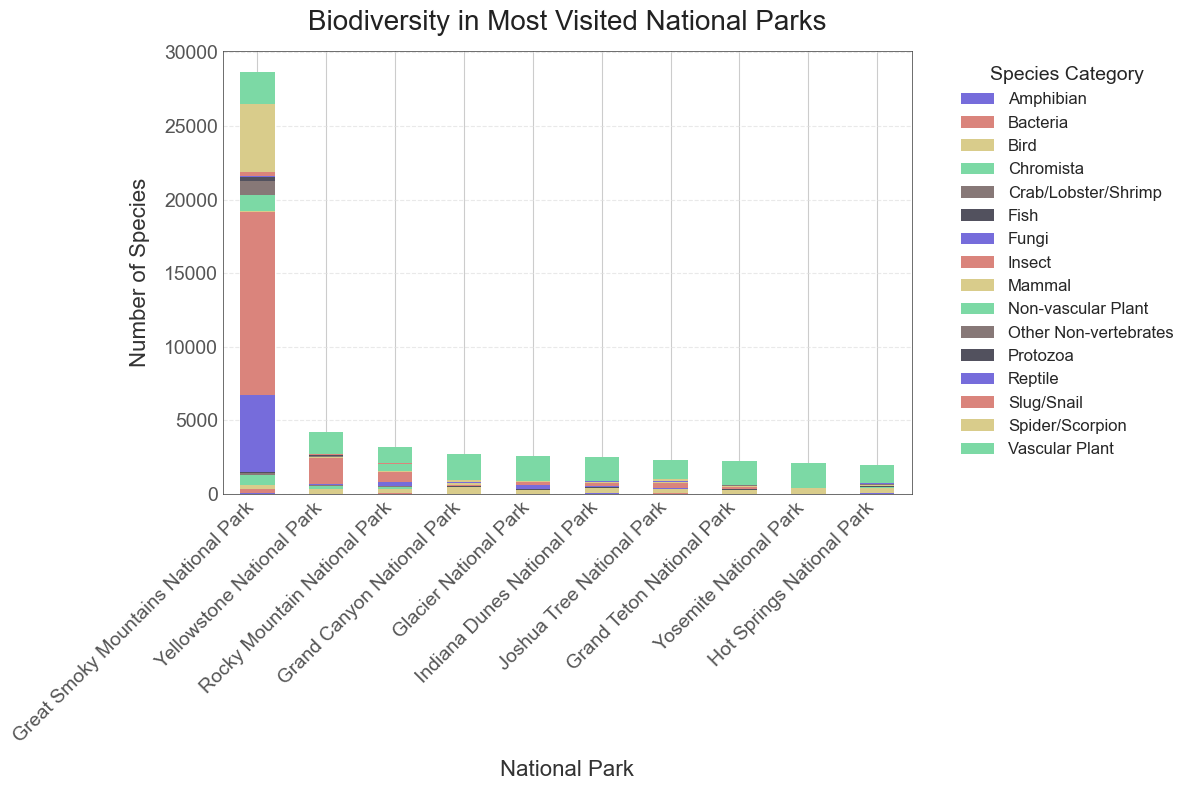

In [5]:
# Create a stacked bar chart for biodiversity
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_axisbelow(True)

biodiversity_data.plot(
    kind='bar', 
    stacked=True, 
    color=colors[:len(biodiversity_data.columns)], 
    ax=ax
)

ax.set_title('Biodiversity in Most Visited National Parks', fontsize=20, pad=15, color='#222222')
ax.set_xlabel('National Park', fontsize=16, labelpad=10, color='#333333')
ax.set_ylabel('Number of Species', fontsize=16, labelpad=10, color='#333333')
plt.xticks(rotation=45, ha='right', fontsize=14, color='#555555')
plt.yticks(fontsize=14, color='#555555')
ax.legend(title='Species Category', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7, color='#E0E0E0')

for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(0.5)

plt.tight_layout()
plt.savefig('biodiversity_in_most_visited_parks.png', dpi=300, bbox_inches='tight')
plt.show()


## Chart 2: Top 15 Parks by Threatened Species Percentage

In [6]:
# Calculate the percentage of threatened species for each park
park_status = pd.crosstab(df['ParkName'], df['ConservationStatus'], normalize='index') * 100

# Ensure 'Endangered/Threatened' column exists
if 'Endangered/Threatened' not in park_status.columns:
    park_status['Endangered/Threatened'] = 0

# Sort parks by endangered percentage
park_status_sorted = park_status.sort_values(by='Endangered/Threatened', ascending=False)

# Display top parks by endangered species percentage
park_status_sorted[['Endangered/Threatened']].head(15)


ConservationStatus,Endangered/Threatened
ParkName,
Olympic National Park,0.564972
Grand Canyon National Park,0.480059
Yosemite National Park,0.479386
Zion National Park,0.333519
Joshua Tree National Park,0.302115
Indiana Dunes National Park,0.281804
Bryce Canyon National Park,0.233100
Grand Teton National Park,0.178015
Acadia National Park,0.175541


C:\Users\trung\AppData\Local\Temp\ipykernel_8604\3287485200.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


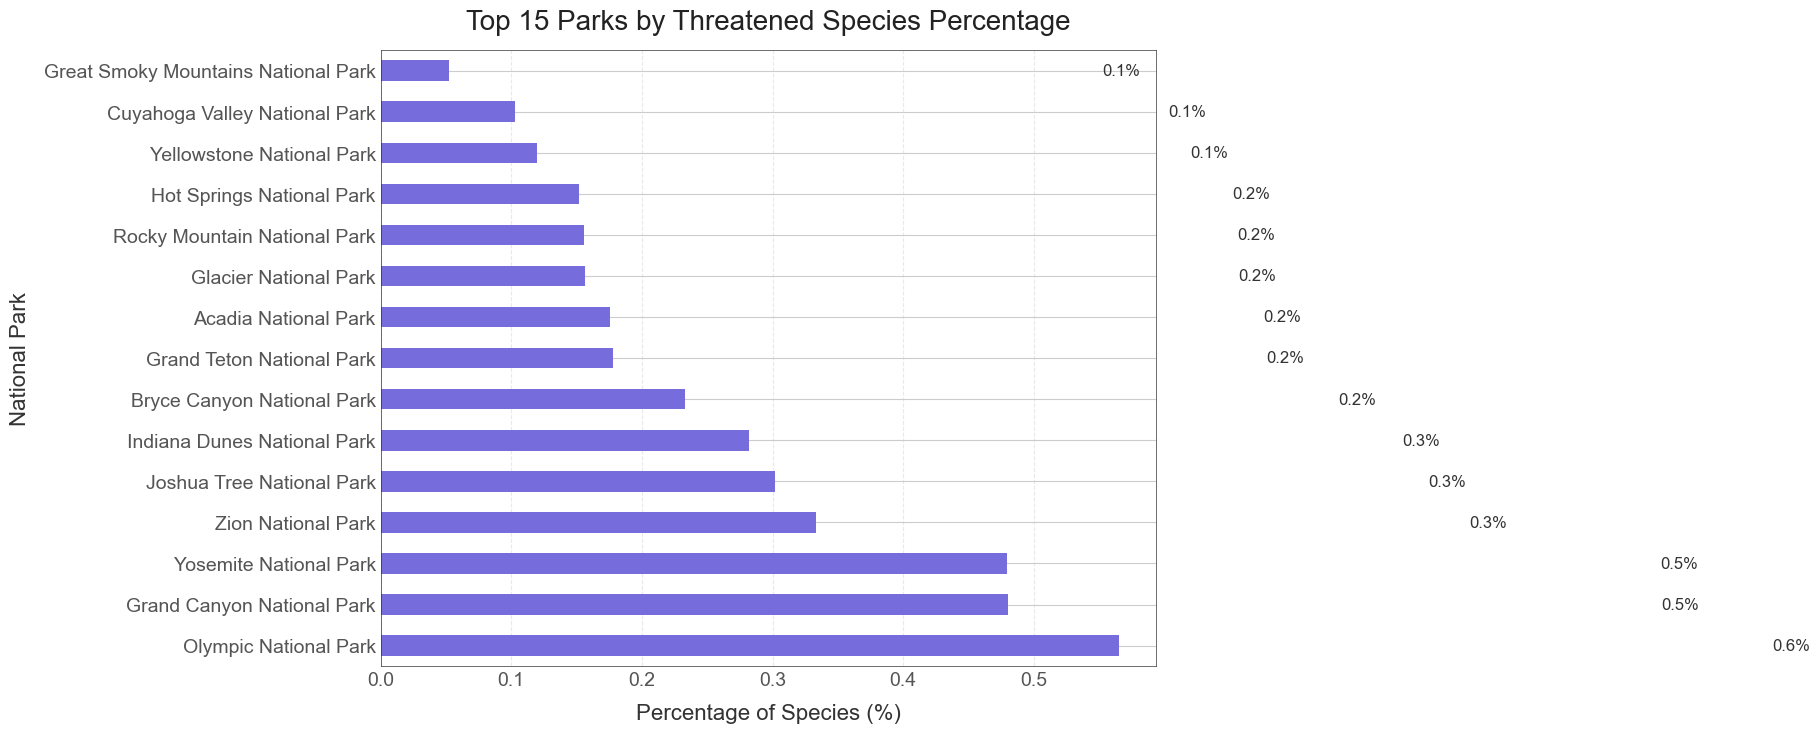

In [7]:
# Create horizontal bar chart for parks with highest proportion of endangered species
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_axisbelow(True)

top_parks = park_status_sorted.head(15)
top_parks['Endangered/Threatened'].plot(
    kind='barh', 
    color=colors[0], 
    ax=ax
)

ax.set_title('Top 15 Parks by Threatened Species Percentage', fontsize=20, pad=15, color='#222222')
ax.set_xlabel('Percentage of Species (%)', fontsize=16, labelpad=10, color='#333333')
ax.set_ylabel('National Park', fontsize=16, labelpad=10, color='#333333')
plt.xticks(fontsize=14, color='#555555')
plt.yticks(fontsize=14, color='#555555')
ax.grid(axis='x', linestyle='--', alpha=0.7, color='#E0E0E0')

for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(0.5)

# Add value labels to the bars
for i, v in enumerate(top_parks['Endangered/Threatened']):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=12, color='#333333')

plt.tight_layout()
plt.savefig('top_15_parks_by_threatened_percentage.png', dpi=300, bbox_inches='tight')
plt.show()


## Chart 3: Top 15 Parks by Total Species Count

In [8]:
# Sort parks by total species count
park_species_count = park_stats.sort_values('TotalSpecies', ascending=False)

# Display top parks by total species count
park_species_count[['TotalSpecies']].head(15)


,TotalSpecies
ParkName,
Great Smoky Mountains National Park,28670
Yellowstone National Park,4179
Rocky Mountain National Park,3213
Grand Canyon National Park,2708
Glacier National Park,2559
Indiana Dunes National Park,2484
Joshua Tree National Park,2317
Grand Teton National Park,2247
Yosemite National Park,2086


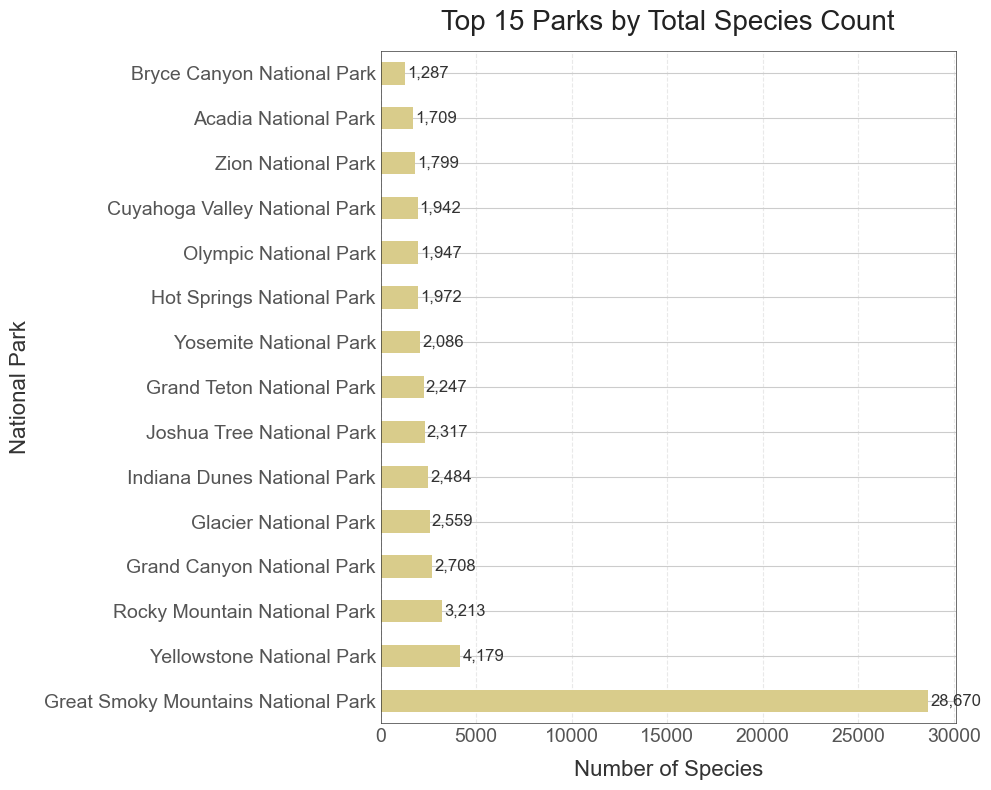

In [9]:
# Create horizontal bar chart for parks with highest species count
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_axisbelow(True)

top_parks_by_count = park_species_count.head(15)
top_parks_by_count['TotalSpecies'].plot(
    kind='barh', 
    color=colors[2], 
    ax=ax
)

ax.set_title('Top 15 Parks by Total Species Count', fontsize=20, pad=15, color='#222222')
ax.set_xlabel('Number of Species', fontsize=16, labelpad=10, color='#333333')
ax.set_ylabel('National Park', fontsize=16, labelpad=10, color='#333333')
plt.xticks(fontsize=14, color='#555555')
plt.yticks(fontsize=14, color='#555555')
ax.grid(axis='x', linestyle='--', alpha=0.7, color='#E0E0E0')

for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(0.5)

# Add value labels to the bars
for i, v in enumerate(top_parks_by_count['TotalSpecies']):
    ax.text(v + 100, i, f'{v:,}', va='center', fontsize=12, color='#333333')

plt.tight_layout()
plt.savefig('top_15_parks_by_species_count.png', dpi=300, bbox_inches='tight')
plt.show()


## Chart 4: Conservation Status in Top 10 National Parks

In [10]:
# Get the top 10 parks by total species
top_10_parks = park_species_count.head(10).index.tolist()

# Filter the dataframe for these parks
top_parks_df = df[df['ParkName'].isin(top_10_parks)]

# Count conservation status for each park
conservation_data = pd.crosstab(top_parks_df['ParkName'], top_parks_df['ConservationStatus'])

# Sort parks by total species count
conservation_data = conservation_data.loc[park_species_count.loc[conservation_data.index].index]

# Display conservation status breakdown
conservation_data.head()


ConservationStatus,Endangered/Threatened,Not Listed,Special Concern
ParkName,,,
Glacier National Park,4,2424,131
Grand Canyon National Park,13,2482,213
Grand Teton National Park,4,2108,135
Great Smoky Mountains National Park,15,28436,219
Hot Springs National Park,3,1833,136


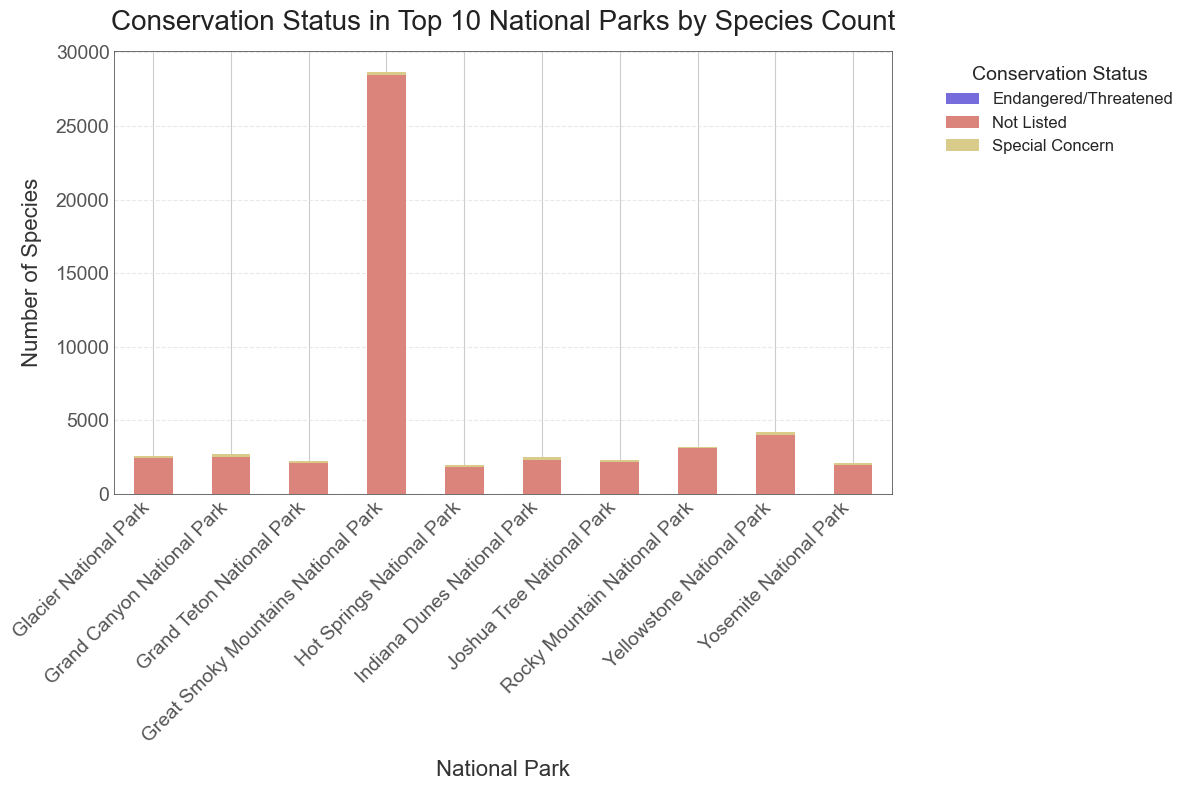

In [11]:
# Create a stacked bar chart for conservation status
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_axisbelow(True)

conservation_data.plot(
    kind='bar', 
    stacked=True, 
    color=[colors[0], colors[1], colors[2]], 
    ax=ax
)

ax.set_title('Conservation Status in Top 10 National Parks by Species Count', fontsize=20, pad=15, color='#222222')
ax.set_xlabel('National Park', fontsize=16, labelpad=10, color='#333333')
ax.set_ylabel('Number of Species', fontsize=16, labelpad=10, color='#333333')
plt.xticks(rotation=45, ha='right', fontsize=14, color='#555555')
plt.yticks(fontsize=14, color='#555555')
ax.legend(title='Conservation Status', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7, color='#E0E0E0')

for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(0.5)

plt.tight_layout()
plt.savefig('conservation_status_top_parks.png', dpi=300, bbox_inches='tight')
plt.show()
